# The goal of this project is to build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe to term deposit products

#### This can also be found on [my Git repository](https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-94Sip)


In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score

## Deliverable 1 - EDA

In [702]:
cust = pd.read_csv('bank-full.csv')
print(f"Shape of customer dataset: {cust.shape}")

Shape of customer dataset: (45211, 17)


In [703]:
cust.head(15)

age           job   marital  education default  balance housing loan  \
0    58    management   married   tertiary      no     2143     yes   no   
1    44    technician    single  secondary      no       29     yes   no   
2    33  entrepreneur   married  secondary      no        2     yes  yes   
3    47   blue-collar   married    unknown      no     1506     yes   no   
4    33       unknown    single    unknown      no        1      no   no   
5    35    management   married   tertiary      no      231     yes   no   
6    28    management    single   tertiary      no      447     yes  yes   
7    42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8    58       retired   married    primary      no      121     yes   no   
9    43    technician    single  secondary      no      593     yes   no   
10   41        admin.  divorced  secondary      no      270     yes   no   
11   29        admin.    single  secondary      no      390     yes   no   
12   53    technician   married  secondary      no        6     yes   no   
13   58    technician   married    unknown      no       71     yes   no   
14   57      services   married  secondary      no      162     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome Target  
0   unknown    5   may       261         1     -1         0  unknown     no  
1   unknown    5   may       151         1     -1         0  unknown     no  
2   unknown    5   may        76         1     -1         0  unknown     no  
3   unknown    5   may        92         1     -1         0  unknown     no  
4   unknown    5   may       198         1     -1         0  unknown     no  
5   unknown    5   may       139         1     -1         0  unknown     no  
6   unknown    5   may       217         1     -1         0  unknown     no  
7   unknown    5   may       380         1     -1         0  unknown     no  
8   unknown    5   may        50         1     -1         0  unknown     no  
9   unknown    5   may        55         1     -1         0  unknown     no  
10  unknown    5   may       222         1     -1         0  unknown     no  
11  unknown    5   may       137         1     -1         0  unknown     no  
12  unknown    5   may       517         1     -1         0  unknown     no  
13  unknown    5   may        71         1     -1         0  unknown     no  
14  unknown    5   may       174         1     -1         0  unknown     no

In [704]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Observations:
1. there do not appear to be any null values since the row count = number of non-null values for each column


#### now checking the number of unique values per column

In [7]:
cust.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [515]:
dup_rows = cust[cust.duplicated()]

dup_rows.shape

(0, 17)

#### There are no duplicate rows in the dataset

#### Now lets look at the distributions of our continuous variables

In [516]:
cust.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

#### Observations:
1. age looks pretty normal: min of 18 (legal adult age)
2. balance looks heavily skewed with significant negative values
3. duration seems to have some significant outliers
4. campaign looks to have outliers
5. pdays is significantly skewed due to the number of -1 values
6. previous looks to have outliers

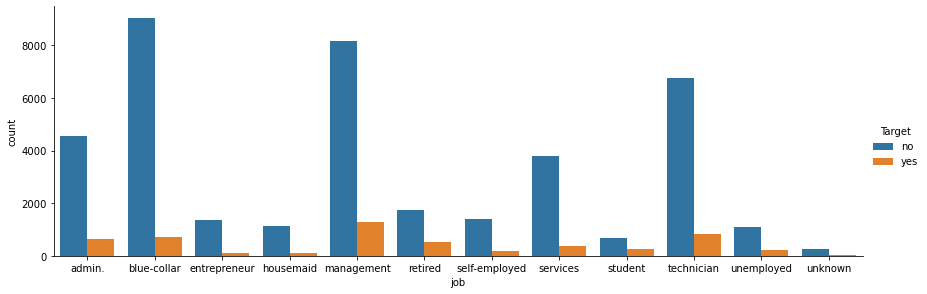

In [9]:
g = sns.catplot(x="job", hue="Target", data=cust, kind="count", height=4, aspect=3)

In [10]:
pd.crosstab(cust['job'],cust['Target'],normalize='columns')

Target               no       yes
job                              
admin.         0.113722  0.119304
blue-collar    0.226041  0.133863
entrepreneur   0.034167  0.023256
housemaid      0.028330  0.020609
management     0.204323  0.245982
retired        0.043785  0.097561
self-employed  0.034868  0.035356
services       0.094810  0.069767
student        0.016758  0.050860
technician     0.169255  0.158820
unemployed     0.027579  0.038192
unknown        0.006362  0.006428

#### Insights: similar to graph, Management and Technician appear to havee highest likelihod

<AxesSubplot:xlabel='education', ylabel='count'>

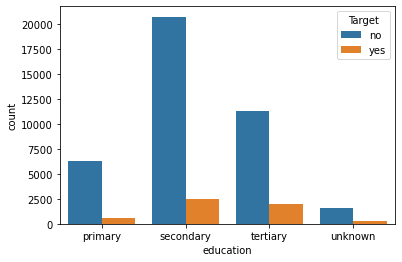

In [11]:
sns.countplot(x='education', data = cust, hue='Target')

In [12]:
pd.crosstab(cust['education'],cust['Target'],normalize='columns') 

Target           no       yes
education                    
primary    0.156806  0.111741
secondary  0.519814  0.463226
tertiary   0.283177  0.377387
unknown    0.040203  0.047646

####  Insight: secondary and teritary education level seems to have highest relationship

<AxesSubplot:xlabel='marital', ylabel='count'>

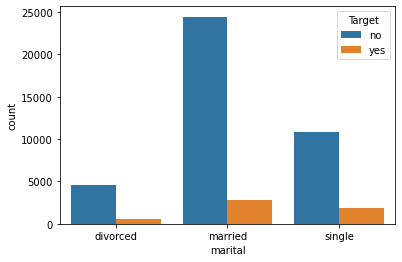

In [13]:
sns.countplot(x='marital', data = cust, hue='Target')

In [14]:
pd.crosstab(cust['marital'],cust['Target'],normalize='columns')
# married and single seem more likely, but not much

Target          no       yes
marital                     
divorced  0.114849  0.117603
married   0.612670  0.520892
single    0.272481  0.361505

#### Insights: Married and single marital status are significant

<AxesSubplot:xlabel='poutcome', ylabel='count'>

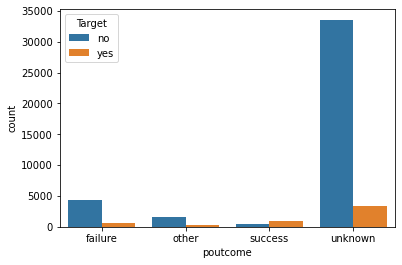

In [15]:
sns.countplot(x='poutcome', data = cust, hue='Target')

In [16]:
pd.crosstab(cust["poutcome"], cust["Target"], normalize='columns')
#previous outcome doesn't seem very significant

Target          no       yes
poutcome                    
failure   0.107284  0.116846
other     0.038400  0.058045
success   0.013351  0.184912
unknown   0.840965  0.640197

In [135]:
pd.crosstab(cust.Target, cust.poutcome)

poutcome  failure  other  success  unknown
Target                                    
no           4283   1533      533    33573
yes           618    307      978     3386

#### Insights: 
1. unfortunately, the majority of the data is labeled "unknown", of which 10% took previous offer
2. However, if the previous outcome was a success, those people are 2x likely to take term deposit offer

<AxesSubplot:xlabel='month', ylabel='count'>

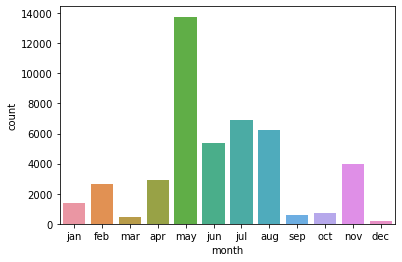

In [17]:
sns.countplot(x='month', data = cust, order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])

In [18]:
pd.crosstab(cust["month"], cust["Target"], normalize='columns')

Target        no       yes
month                     
apr     0.058990  0.109094
aug     0.139247  0.130081
dec     0.002856  0.018907
feb     0.055308  0.083381
jan     0.031587  0.026848
jul     0.157006  0.118548
jun     0.120109  0.103233
mar     0.005736  0.046890
may     0.321652  0.174891
nov     0.089349  0.076196
oct     0.010395  0.061070
sep     0.007765  0.050860

#### Insights: May and August seem to be the most indicative, but not by much overall

<AxesSubplot:xlabel='day', ylabel='count'>

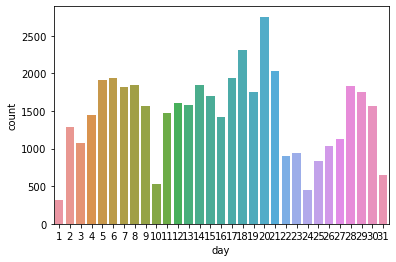

In [19]:
sns.countplot(x='day', data = cust)

In [20]:
pd.crosstab(cust['day'],cust['Target'],normalize='columns')

Target        no       yes
day                       
1       0.005811  0.017016
2       0.027829  0.034411
3       0.022569  0.033655
4       0.030434  0.043486
5       0.042458  0.040650
6       0.043861  0.034222
7       0.041581  0.029684
8       0.041105  0.038003
9       0.034618  0.033844
10      0.010095  0.022878
11      0.032513  0.034222
12      0.034041  0.046133
13      0.033666  0.045566
14      0.041030  0.039705
15      0.036697  0.044999
16      0.030635  0.036302
17      0.044161  0.033277
18      0.052102  0.043108
19      0.040955  0.023067
20      0.064125  0.036302
21      0.045714  0.038003
22      0.018812  0.029117
23      0.020365  0.023823
24      0.009644  0.011722
25      0.017710  0.025147
26      0.023020  0.021932
27      0.024322  0.028361
28      0.042257  0.027037
29      0.040479  0.024390
30      0.032438  0.051238
31      0.014954  0.008697

#### Insight: treating day like a categorical value there is no value from this feature

<AxesSubplot:xlabel='housing', ylabel='count'>

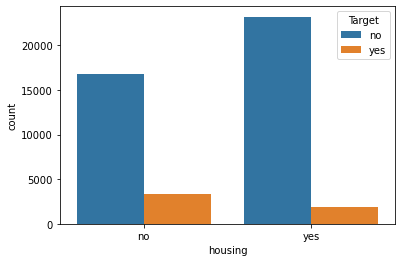

In [21]:
sns.countplot(x='housing', data = cust, hue='Target')

In [22]:
pd.crosstab(cust['housing'],cust['Target'],normalize='columns')

Target         no       yes
housing                    
no       0.418992  0.634146
yes      0.581008  0.365854

#### Insights: people with housing loan are less likely and people without housing loan are more likely

<AxesSubplot:xlabel='loan', ylabel='count'>

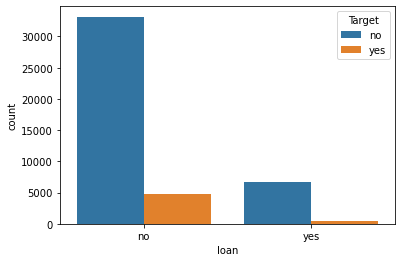

In [23]:
sns.countplot(x='loan', data = cust, hue='Target')

In [24]:
pd.crosstab(cust['loan'],cust['Target'],normalize='columns')

Target       no       yes
loan                     
no      0.83067  0.908489
yes     0.16933  0.091511

#### Insights: people w/o a loan are likely, and if they already have a loan, they are less likely

<AxesSubplot:xlabel='contact', ylabel='count'>

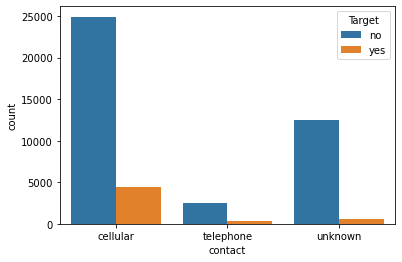

In [25]:
sns.countplot(x='contact', data = cust, hue='Target')

In [26]:
pd.crosstab(cust["contact"], cust["Target"], normalize='columns')

Target           no       yes
contact                      
cellular   0.624117  0.826054
telephone  0.063023  0.073738
unknown    0.312860  0.100208

#### Insights: Cellular is leading indicator, but does that really matter vs telephone? They are same thing. This feature is not very interesting.

<AxesSubplot:xlabel='default', ylabel='count'>

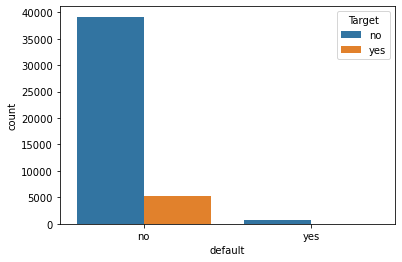

In [27]:
sns.countplot(x='default', data = cust, hue='Target')

In [28]:
pd.crosstab(cust['default'],cust['Target'],normalize='columns')

Target         no       yes
default                    
no       0.980888  0.990168
yes      0.019112  0.009832

#### Insight: people who don't have credit in default are likely

### Now let's look at relationship of contiuous features to Target

In [29]:
cust.groupby(['Target']).mean()

age      balance        day    duration  campaign      pdays  \
Target                                                                       
no      40.838986  1303.714969  15.892290  221.182806  2.846350  36.421372   
yes     41.670070  1804.267915  15.158253  537.294574  2.141047  68.702968   

        previous  
Target            
no      0.502154  
yes     1.170354

In [30]:
cust.groupby(['Target']).median()

age  balance  day  duration  campaign  pdays  previous
Target                                                        
no       39      417   16       164         2     -1         0
yes      38      733   15       426         2     -1         0

##### Insights:
1. Balance is higher for people who take Term Deposit
2. People who take  term deposit require longer contact duration -> stay on the phone with the customer

C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


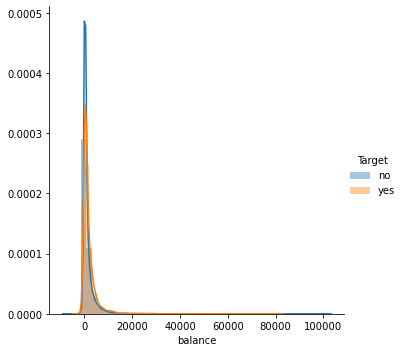

In [31]:
sns.FacetGrid(cust, hue='Target', height=5).map(sns.distplot, "balance").add_legend()

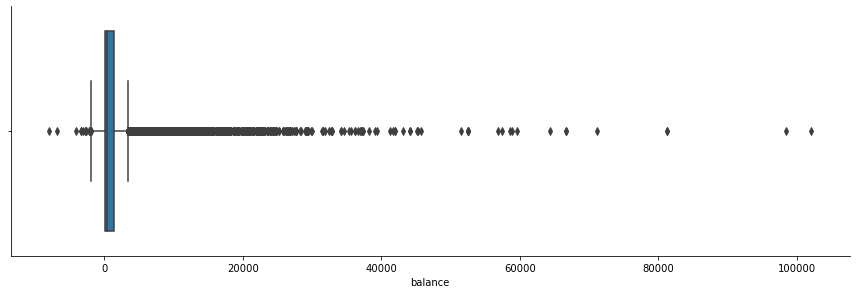

In [696]:
g = sns.catplot(x="balance", data=cust, kind="box", height=4, aspect=3)

C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


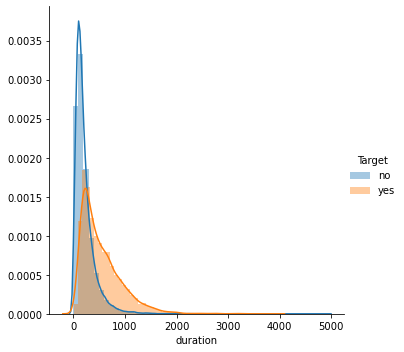

In [33]:
sns.FacetGrid(cust, hue='Target', height=5).map(sns.distplot, "duration").add_legend()

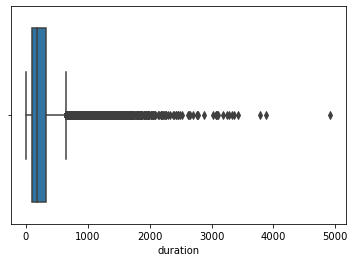

In [34]:
ax=sns.boxplot(x=cust["duration"])

C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


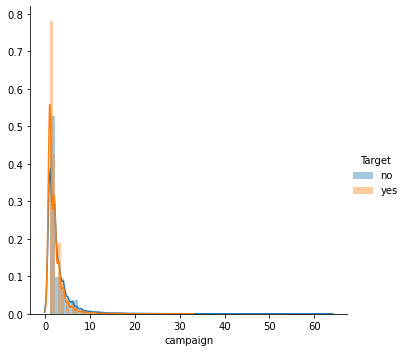

In [47]:
sns.FacetGrid(cust, hue='Target', height=5).map(sns.distplot, "campaign").add_legend()

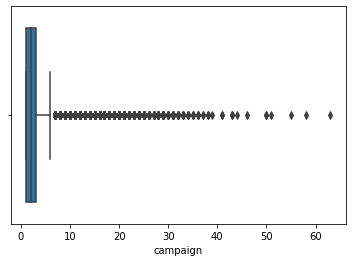

In [36]:
ax=sns.boxplot(x=cust['campaign'])

C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


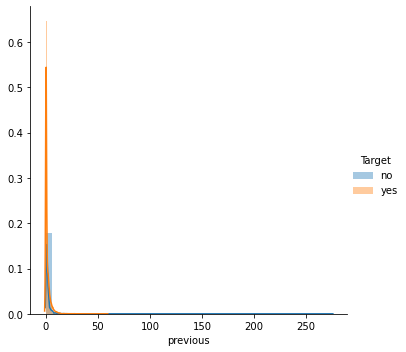

In [37]:
sns.FacetGrid(cust, hue='Target', height=5).map(sns.distplot, "previous").add_legend()

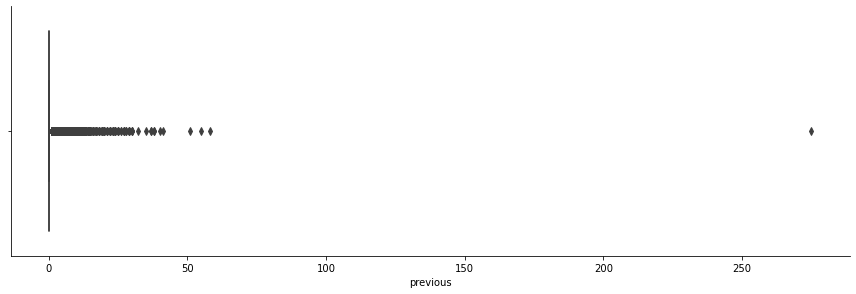

In [118]:
g = sns.catplot(x="previous", data=cust, kind="box", height=4, aspect=3)

In [39]:
cust.query("previous > 90")

age         job  marital education default  balance housing loan  \
29182   40  management  married  tertiary      no      543     yes   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
29182  cellular    2   feb       349         2    262       275    other   

      Target  
29182     no

In [130]:
cust1 = cust[cust.previous < 275]
cust1.shape

(45210, 17)

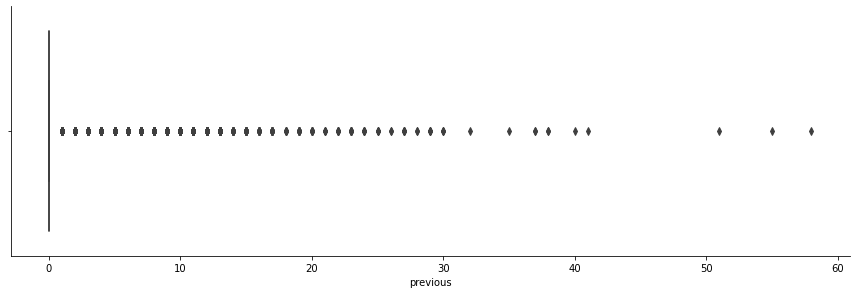

In [133]:
g1 = sns.catplot(x="previous", data=cust1, kind="box", height=4, aspect=3)

In [131]:
cust1.groupby(['Target']).mean()

age      balance        day    duration  campaign      pdays  \
Target                                                                       
no      40.839007  1303.734025  15.892638  221.179605  2.846372  36.415721   
yes     41.670070  1804.267915  15.158253  537.294574  2.141047  68.702968   

        previous  
Target            
no      0.495278  
yes     1.170354

#### Regarding previous outlier:
1. this one value is significantly outside the range of previous values
2. with the outlier dropped, mean of previous is more than 2x likely to take term deposit

*Recommendation to drop this outlier from the dataset*

C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

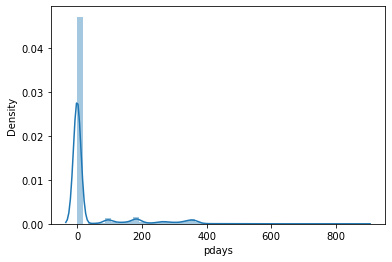

In [40]:
sns.distplot(cust['pdays'])

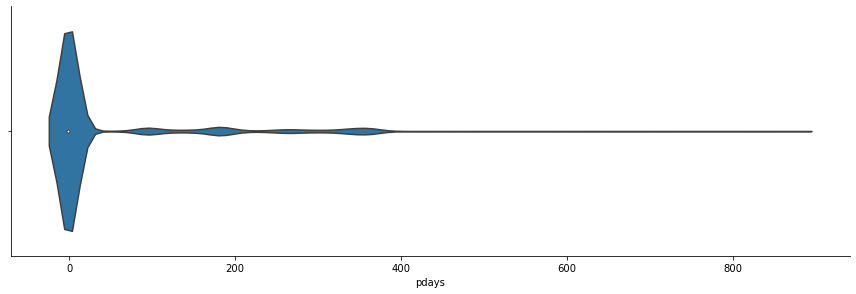

In [56]:
g = sns.catplot(x="pdays", data=cust, kind="violin", height=4, aspect=3)

In [88]:
(r,c) = cust.query("pdays < 0").shape

print(f"Number of rows where 'pdays = -1' is {r}, which means this customer has not been contacted or they haven't been contacted in at least 900 days")
print(f"This comprises {(r/45211)*100}% of the dataset")

Number of rows where 'pdays = -1' is 36954, which means this customer has not been contacted or they haven't been contacted in at least 900 days
This comprises 81.73674548229414% of the dataset


In [93]:
# let's anylyze the number of people where pdays is -1 and see if it impacts the Target variable
cust.query("pdays <0").groupby("Target").pdays.count()

Target
no     33570
yes     3384
Name: pdays, dtype: int64

In [112]:
other_pdays = 45211-r
print(f"Of the {other_pdays} rows where pdays <> -1, approximately {(3384/33570)*100}% responded to the Term Deposit offer")

Of the 8257 rows where pdays <> -1, approximately 10.080428954423592% responded to the Term Deposit offer


In [109]:
# let's anylyze the number of people where pdays is not -1 by Target
cust.query("pdays>-1 & pdays <= 365").groupby("Target").pdays.count()

Target
no     5897
yes    1717
Name: pdays, dtype: int64

In [116]:
one_year_pdays = 5897+1717

print(f"Of the {other_pdays} rows where pdays <> -1, {one_year_pdays} ({(one_year_pdays/other_pdays)*100}%) were contacted within 1 year, and {(1717/5897)*100}% of that group took a Term Deposit offer")

Of the 8257 rows where pdays <> -1, 7614 (92.21266803923943%) were contacted within 1 year, and 29.116499915211126% of that group took a Term Deposit offer


In [110]:
cust.query("pdays > 365").groupby("Target").pdays.count()

Target
no     455
yes    188
Name: pdays, dtype: int64

In [502]:
cust.query("pdays > 800").groupby("Target").pdays.count()

Target
no     6
yes    5
Name: pdays, dtype: int64

In [159]:
mtoneyear_pdays = 455+188

print(f"Of the {other_pdays} rows where pdays <> -1, {mtoneyear_pdays} ({(mtoneyear_pdays/other_pdays)*100}%) were contacted after 1 year, and {(188/455)*100}% of that group took a Term Deposit offer")

Of the 8257 rows where pdays <> -1, 643 (7.787331960760567%) were contacted after 1 year, and 41.318681318681314% of that group took a Term Deposit offer


In [660]:
#### Note - I originally was going to bin the pdays parameter, but it proved to not be valuable so I have eliminated this

#now to transform pdays into bins according to discussion earlier

#cut_labels_pdays = ['never', '0-1yr', '1yr+']
#cut_bins = [-2, 1, 365, 900]
#cust['pdays_cat'] = pd.cut(cust['pdays'], bins=cut_bins, labels=cut_labels_pdays)
#cust.tail(20)

C:\Users\natha\Anaconda3\envs\pgaiml\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

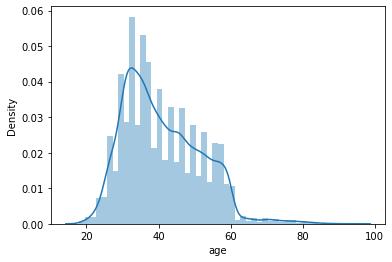

In [42]:
sns.distplot(cust['age'])

#### Insights: Age is distributed as one could expect, but based on crosstab analysis, it is not a significant factor wrt predicting Target (taking Term deposit)

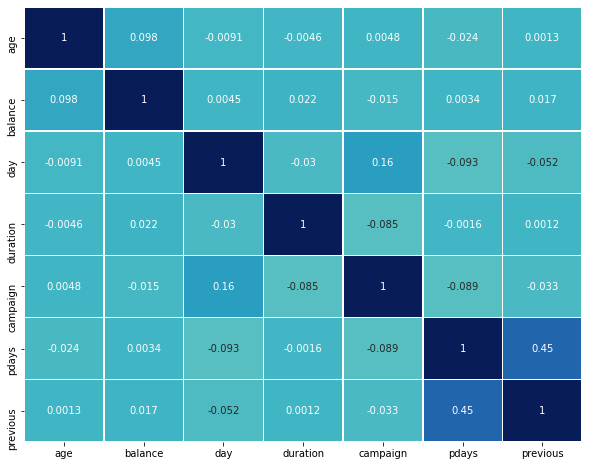

In [137]:
plt.figure(figsize=(10,8))
sns.heatmap(cust.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

#### Insights:
1. Previous and pdays have highest level of correlation - to be expected since they are both wrt previous campaign

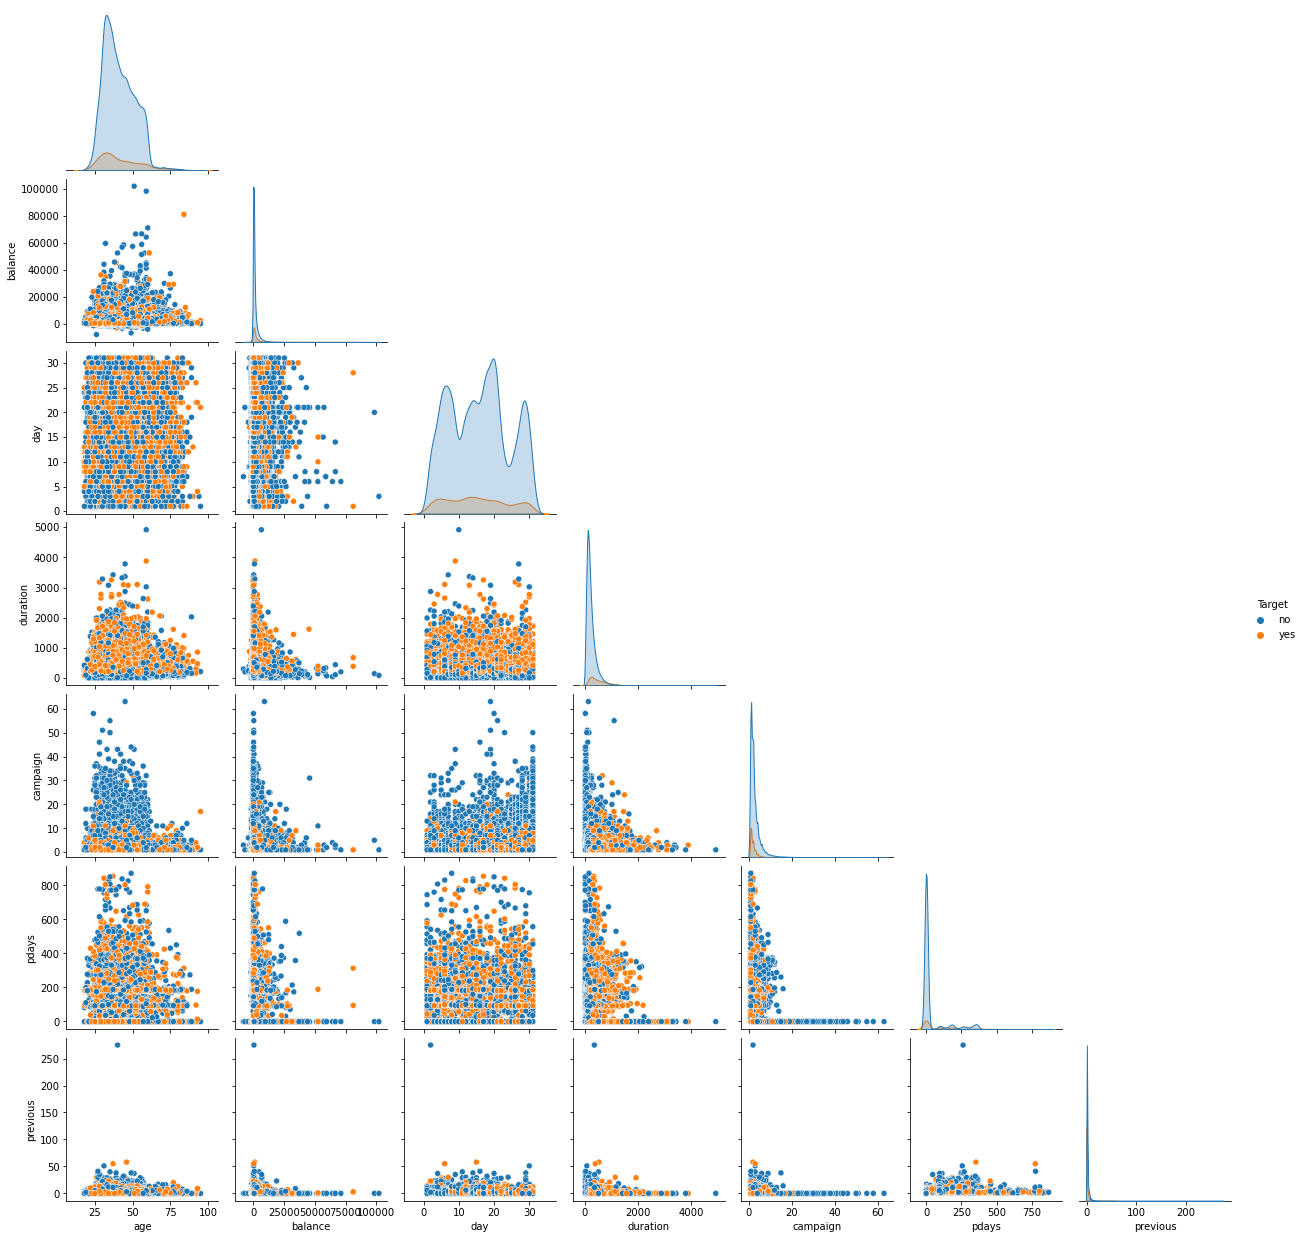

In [45]:
sns.pairplot(cust,diag_kind='kde', vars=['age', 'balance', 'day','duration', 'campaign', 'pdays', 'previous'], corner=True, hue='Target')

### Summary Observations from Univariate Analysis:
1. age looks pretty normal: min of 18 (legal adult age)
2. job seems to be fine - no data quality issues
3. marital seems to be fine - no data quality issues
4. education seems to be fine - no data quality issues
5. default 
6. housing 
7. loan
8. balance appears to have some negative values which need to be dealt with. The balance data is skewed but the values are understandable (people with large balances, e.g. wealthy).
9. contact 
10. month appear to be ok from a data quality perspective
11. day appear to be ok from a data quality perspective
12. campaign and duration are both skewed, but we will leave them in place because they appear to not be data quality problems
13. pdays is significantly skewed due to the number of -1 values
14. previous feature has one outlier that is extreme - recommend removing this one row
15. poutcome has a large number of values of "unknown". This seems to be of limited value as a predictive feature


### Summary observations from Multivariate Analysis
#### Note: Above I have employed various Multivariate techniques to evaluate each feature, and the below is a Summary
1. age does NOT appear to be relevant to Target (DROP)
2. based on groupby, some jobs appear to be more important than others (KEEP)
3. Married and Single marital status look to be predictive (KEEP)
4. Certain Education categories look to be predictive (KEEP)
5. default indicates that people who are not in default state are likely (keep)
6. housing: people with housing loan are less likely and people without housing loan are more likely (keep)
7. loan: people w/o a loan are likely, and if they already have a loan, they are less likely (keep)
8. balance: we are going to assume that negative balances are a sign of overdraft, and therefore legitimate values
9. contact: Cellular is leading indicator, but does that really matter vs telephone? They are same thing. Even though this data looks to be indicative I don't believe this really provides any value, but I will keep for modeling purposes. (KEEP)
10. Month: doesn't seem to be indicative (DROP)
11. Day: also doesn't appear to be indicative (DROP)
12. Campaign: based on crosstab looking at both mean and median, this does not appear to be indicative (DROP)
13. pdays: See analysis in the above cells. However, this field demonstrates colinearity with previous. In the above crosstab analysis, previous appears to be more indicate, so I recommend dropping pdays (DROP)
14. previous - with or without the outlier, the mean of people who took previous offer is 2x that of those who didnt(keep)
15. poutcome - Based on above analysis, people labeled as previous 'success' were 2x as likely to take new offer. But there is such a large number of "unknown" records that it is of little value (DROP)
16. duration - this appears to be a signficant value. It has some outliers but that is important (KEEP)

## Deliverable 2 - Prepare data for analytics

In [705]:
#drop unnecessary features
# contact, month, campaign
cust.drop(columns=["age","day", "month", "campaign", 'pdays', 'poutcome'], inplace=True)

In [706]:
#convert object columns to category dtype
for feature in cust.columns: # Loop through all columns in the dataframe
    if cust[feature].dtype == 'object': # Only apply for columns with categorical strings
        cust[feature] = pd.Categorical(cust[feature])# Replace strings with an integer
cust.head(10)

job   marital  education default  balance housing loan  contact  \
0    management   married   tertiary      no     2143     yes   no  unknown   
1    technician    single  secondary      no       29     yes   no  unknown   
2  entrepreneur   married  secondary      no        2     yes  yes  unknown   
3   blue-collar   married    unknown      no     1506     yes   no  unknown   
4       unknown    single    unknown      no        1      no   no  unknown   
5    management   married   tertiary      no      231     yes   no  unknown   
6    management    single   tertiary      no      447     yes  yes  unknown   
7  entrepreneur  divorced   tertiary     yes        2     yes   no  unknown   
8       retired   married    primary      no      121     yes   no  unknown   
9    technician    single  secondary      no      593     yes   no  unknown   

   duration  previous Target  
0       261         0     no  
1       151         0     no  
2        76         0     no  
3        92         0     no  
4       198         0     no  
5       139         0     no  
6       217         0     no  
7       380         0     no  
8        50         0     no  
9        55         0     no

In [564]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        45211 non-null  category
 1   marital    45211 non-null  category
 2   education  45211 non-null  category
 3   default    45211 non-null  category
 4   balance    45211 non-null  int64   
 5   housing    45211 non-null  category
 6   loan       45211 non-null  category
 7   contact    45211 non-null  category
 8   duration   45211 non-null  int64   
 9   previous   45211 non-null  int64   
 10  poutcome   45211 non-null  category
 11  Target     45211 non-null  category
dtypes: category(9), int64(3)
memory usage: 1.4 MB


In [707]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = cust['Target'].value_counts(normalize=True)
print(prop_Y)

no     0.883015
yes    0.116985
Name: Target, dtype: float64


#### _There is a notable amount of imbalance in the Target class

How this will be addressed:
1. We have already eliminated, in the above analyses, the features that do not add value (age, day, month, etc)
2. Using Ensemble methods will also reduce this issue 
3. Will use the stratify=y parameter in the train_test_split method, and the class_weight=balanced hyperparameter of the various models that support this capability.
4. You will also see that I am going to use the BalancedBaggingClassifier from Imbalanced-Learn library, which employs undersampling techniques to deal with class imbalance in the Target feature

[Reference Material](https://medium.com/quantyca/how-to-handle-class-imbalance-problem-9ee3062f2499)
[Another Reference](https://towardsdatascience.com/oversampling-and-undersampling-5e2bbaf56dcf)

In [708]:
#for logistic regression, going to use One-Hot for the categories with cardinality >2
#for all categories of no/yes, just going to convert to 0/1
replaceStruct = {
                "default":     {"no": 0, "yes": 1 },
                "housing":     {"no": 0, "yes": 1 },
                "loan":        {"no": 0, "yes": 1 },
                "Target":      {"no": 0, "yes": 1 } 
                }

cust = cust.replace(replaceStruct)

In [709]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        45211 non-null  category
 1   marital    45211 non-null  category
 2   education  45211 non-null  category
 3   default    45211 non-null  int64   
 4   balance    45211 non-null  int64   
 5   housing    45211 non-null  int64   
 6   loan       45211 non-null  int64   
 7   contact    45211 non-null  category
 8   duration   45211 non-null  int64   
 9   previous   45211 non-null  int64   
 10  Target     45211 non-null  int64   
dtypes: category(4), int64(7)
memory usage: 2.6 MB


In [710]:
X = cust.drop("Target", axis=1)
y = cust["Target"]

### Note for the below cell:

I decided to test out applying StandardScaler to the numeric columns. After running thru the various models below, the performance of the models did not improve.

Based on this, I then looked at applying techniques to deal with the imbalance in the Target feature.

In [546]:
#scale numeric features

#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', StandardScaler(), ['balance','duration','previous']),
#        ('oh', OneHotEncoder(dtype='int'), ['job','marital','education','contact','poutcome'])],
#    remainder='passthrough')

#X_lr = preprocessor.fit_transform(X)

# Feature list: 'balance','duration','previous','job(12)','marital(3)','education(4)','contact(3)','poutcome(4)', 'default','housing','loan'

In [711]:
#X_lr = pd.get_dummies(X, columns=['job','contact','marital','education','poutcome'])
X_lr = pd.get_dummies(X, columns=['job','contact','marital','education'])

X_lr.head(5)

default  balance  housing  loan  duration  previous  job_admin.  \
0        0     2143        1     0       261         0           0   
1        0       29        1     0       151         0           0   
2        0        2        1     1        76         0           0   
3        0     1506        1     0        92         0           0   
4        0        1        0     0       198         0           0   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  contact_cellular  \
0                0                 0              0  ...                 0   
1                0                 0              0  ...                 0   
2                0                 1              0  ...                 0   
3                1                 0              0  ...                 0   
4                0                 0              0  ...                 0   

   contact_telephone  contact_unknown  marital_divorced  marital_married  \
0                  0                1                 0                1   
1                  0                1                 0                0   
2                  0                1                 0                1   
3                  0                1                 0                1   
4                  0                1                 0                0   

   marital_single  education_primary  education_secondary  education_tertiary  \
0               0                  0                    0                   1   
1               1                  0                    1                   0   
2               0                  0                    1                   0   
3               0                  0                    0                   0   
4               1                  0                    0                   0   

   education_unknown  
0                  0  
1                  0  
2                  0  
3                  1  
4                  1  

[5 rows x 28 columns]

#### *NOTE: using the stratify=y parameter to deal with class imbalance*

In [712]:
#create test and training sets for logistic Regression

from sklearn.model_selection import train_test_split

X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y, test_size=.30, random_state=1, stratify=y)

## Deliverable 3: The actual modeling!

### General Notes:
1. the class_weight=balanced parameter: this resulted in better performance (for several of the models) and was chosen because of the stratify=y parameter of train_test_split. HOWEVER, for certain models, I believe the technique of under/over sampling is the better technique.
2. I am using LogsticRegressionCV, to help with the evaluation of various hyperparameters. I have run thru this multiple times and liblinear appears to give best results.


### Business Context:
1. A term deposit is a low risk offering by a bank. There is no risk of default by the customer since the customer is depositing money with the bank. If the customer withdraws the money from the bank, there is usually an early-withdrawal penalty.
2. Also, the Problem Statement did not state that the bank is trying to minimize marketing costs.
3. Therefore, I am choosing Recall as the appropriate metric as Recall focuses on predicting positive results and there is no penalty for false positives, and False Negatives are acceptable because the customer chose to take the Term Deposit offer.

In [613]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [713]:
scores = pd.DataFrame()

lr_model = LogisticRegressionCV(scoring="balanced_accuracy", class_weight="balanced", random_state=7, solver="liblinear")
lr_model.fit(X_lr_train, y_lr_train)                   

LogisticRegressionCV(class_weight='balanced', random_state=7,
                     scoring='balanced_accuracy', solver='liblinear')

In [714]:
y_predict = lr_model.predict(X_lr_test)

### Looking at feature importances

In [715]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
lr_importance = lr_model.coef_[0]

for i,v in enumerate(lr_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.15361
Feature: 1, Score: 0.00002
Feature: 2, Score: -0.87599
Feature: 3, Score: -0.57735
Feature: 4, Score: 0.00507
Feature: 5, Score: 0.17562
Feature: 6, Score: 0.07092
Feature: 7, Score: -0.36043
Feature: 8, Score: -0.25544
Feature: 9, Score: -0.18511
Feature: 10, Score: -0.07796
Feature: 11, Score: 0.40933
Feature: 12, Score: -0.20523
Feature: 13, Score: -0.28049
Feature: 14, Score: 0.35177
Feature: 15, Score: -0.15634
Feature: 16, Score: -0.01500
Feature: 17, Score: -0.06782
Feature: 18, Score: 0.18652
Feature: 19, Score: 0.03206
Feature: 20, Score: -0.99039
Feature: 21, Score: -0.26845
Feature: 22, Score: -0.41830
Feature: 23, Score: -0.08507
Feature: 24, Score: -0.44175
Feature: 25, Score: -0.25579
Feature: 26, Score: -0.02635
Feature: 27, Score: -0.04792


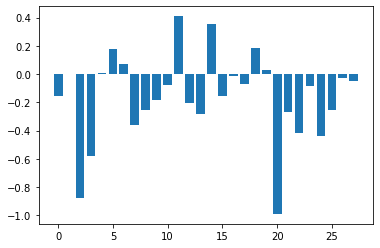

In [716]:
from matplotlib import pyplot

# plot feature importance
pyplot.bar([x for x in range(len(lr_importance))], lr_importance)
pyplot.show()


#### Observations:

1. only about 3 features correlated to taking a Term Deposit, with 2 features being significant contributors
2. Features 11 (job=management), 14(job=services), 18(contact=cellular), 5 (previous)

*Therefore, we can state the the most predictive features are if they took a TD offer previously and the duration of the contact with the customer*

In [717]:
# Observe the predicted and observed classes in a dataframe.
z = X_lr_test.copy()
z['Observed Loan Status'] = y_lr_test
z['Predicted Loan Status'] = y_predict
z.head()

default  balance  housing  loan  duration  previous  job_admin.  \
15028        0     7032        0     0       102         0           0   
24158        0      676        0     0       486         0           0   
41370        0      869        0     0        89         0           0   
17283        0     -278        1     0       143         0           0   
2324         0      594        1     0       134         0           1   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  contact_unknown  \
15028                0                 0              0  ...                0   
24158                0                 0              0  ...                0   
41370                1                 0              0  ...                0   
17283                0                 0              1  ...                0   
2324                 0                 0              0  ...                1   

       marital_divorced  marital_married  marital_single  education_primary  \
15028                 0                1               0                  0   
24158                 0                1               0                  0   
41370                 0                0               1                  0   
17283                 0                1               0                  0   
2324                  0                0               1                  0   

       education_secondary  education_tertiary  education_unknown  \
15028                    1                   0                  0   
24158                    0                   1                  0   
41370                    1                   0                  0   
17283                    1                   0                  0   
2324                     0                   1                  0   

       Observed Loan Status  Predicted Loan Status  
15028                     0                      0  
24158                     1                      1  
41370                     0                      0  
17283                     0                      0  
2324                      0                      0  

[5 rows x 30 columns]

In [619]:

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()    
    

def capture_model_performance(classifier, classifier_name, scores_df, x_train, y_train, x_test, y_test, y_pred):
    train_acc = classifier.score(x_train, y_train)
    test_acc = classifier.score(x_test, y_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)
    rocauc = roc_auc_score(y_test,y_pred)
    
    clf_score = pd.DataFrame(
        {classifier_name: [train_acc, test_acc, bal_acc, rec, prec, f1, rocauc]},
        index=['Training Accuracy','Testing Accuracy','Balanced Accuracy','Recall','Precision','F1','ROC_AUC']
    )
    
    scores_df = pd.concat([scores_df, clf_score], axis=1).round(decimals=3)
    return scores_df

Logistic Regression Confusion Matrix


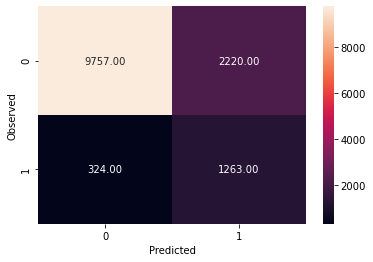

None



LR cw
Training Accuracy  0.802
Testing Accuracy   0.805
Balanced Accuracy  0.805
Recall             0.796
Precision          0.363
F1                 0.498
ROC_AUC            0.805

In [718]:
print('Logistic Regression Confusion Matrix')
print(draw_cm(y_lr_test,y_predict))
print()

scores = capture_model_performance(lr_model, "LR cw", scores, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_predict)
scores

### Now, DecisionTree Modeling

In [621]:
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from sklearn import tree
from os import system
import pydotplus as pydot

In [719]:

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1, class_weight="balanced" )
dTree.fit(X_lr_train, y_lr_train)
y_predict = dTree.predict(X_lr_test)

Decision Tree Confusion Matrix


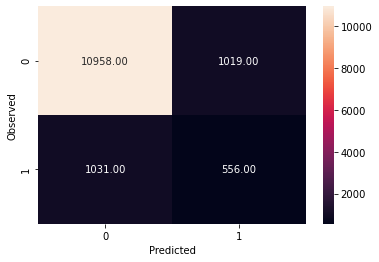

None



LR cw  DT cw
Training Accuracy  0.802  1.000
Testing Accuracy   0.805  0.849
Balanced Accuracy  0.805  0.633
Recall             0.796  0.350
Precision          0.363  0.353
F1                 0.498  0.352
ROC_AUC            0.805  0.633

In [720]:
print('Decision Tree Confusion Matrix')

print(draw_cm(y_lr_test,y_predict))
print()

scores = capture_model_performance(dTree, "DT cw", scores, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_predict)
scores

#### Observations: 
1. By not pruning the tree, the accuracy can be very high, but the other metrics (Recall, Precision, F1), which are more important, are also not good.
2. there is a notable amount of overfitting, as the training accuracy is nearly 100%, while accuracy on the test dataset was approx. 86%
3. DT cw means I used a DecisionTree with class_weight=balanced hyperparameter

### Visualize the tree

In [680]:
train_char_label = ['0', '1']
TD_Tree_File = open('td_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=TD_Tree_File, feature_names = list(X_lr_train), class_names = list(train_char_label))
TD_Tree_File.close()

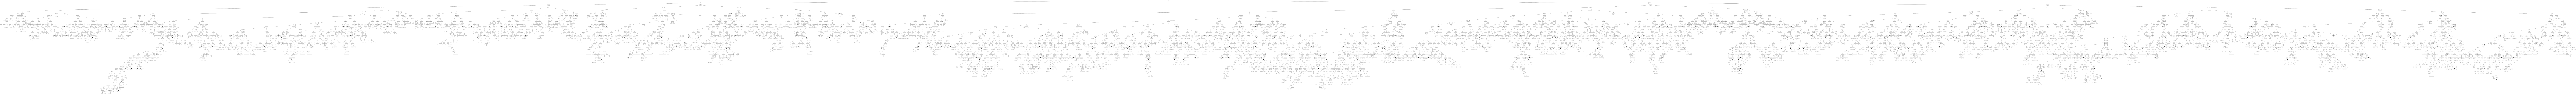

In [681]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng td_tree.dot -o td_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("td_tree.png"))

In [721]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
dt_importance = dTree.feature_importances_

print (pd.DataFrame(dt_importance, columns = ["Imp"], index = X_lr_train.columns))

                          Imp
default              0.001528
balance              0.193524
housing              0.050471
loan                 0.015046
duration             0.447526
previous             0.060404
job_admin.           0.009893
job_blue-collar      0.009387
job_entrepreneur     0.005104
job_housemaid        0.003508
job_management       0.011472
job_retired          0.008057
job_self-employed    0.006550
job_services         0.007366
job_student          0.006321
job_technician       0.011958
job_unemployed       0.005822
job_unknown          0.001285
contact_cellular     0.005952
contact_telephone    0.006598
contact_unknown      0.068031
marital_divorced     0.008689
marital_married      0.011443
marital_single       0.009836
education_primary    0.008465
education_secondary  0.010059
education_tertiary   0.010114
education_unknown    0.005592


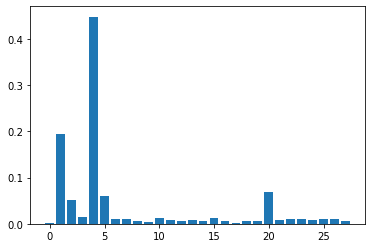

In [722]:
# plot feature importance
pyplot.bar([x for x in range(len(dt_importance))], dt_importance)
pyplot.show()

### Observations:
1. This decision tree has 4 features that are relvant: Feature 4 (Duration), Feature 1 (Balance), and Feature 20 (Contact=unknown).
2. As mentioned earlier in this analysis, the first 2 features make sense, and the 4th feature is not very helpful (Contact=unknown).


#### Now let's try and reduce DecisionTree overfitting

Regularized Decision Tree Confusion Matrix


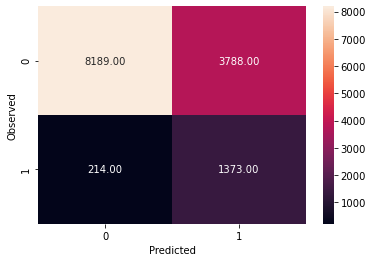

None



LR cw  DT cw  Pruned DT cw
Training Accuracy  0.802  1.000         0.708
Testing Accuracy   0.805  0.849         0.705
Balanced Accuracy  0.805  0.633         0.774
Recall             0.796  0.350         0.865
Precision          0.363  0.353         0.266
F1                 0.498  0.352         0.407
ROC_AUC            0.805  0.633         0.774

In [723]:
#chose depth of 3 because of the complexity of the original decision tree
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1, class_weight='balanced')
dTreeR.fit(X_lr_train, y_lr_train)

y_predict = dTreeR.predict(X_lr_test)

print('Regularized Decision Tree Confusion Matrix')

print(draw_cm(y_lr_test,y_predict))
print()

scores = capture_model_performance(dTreeR, "Pruned DT cw", scores, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_predict)
scores

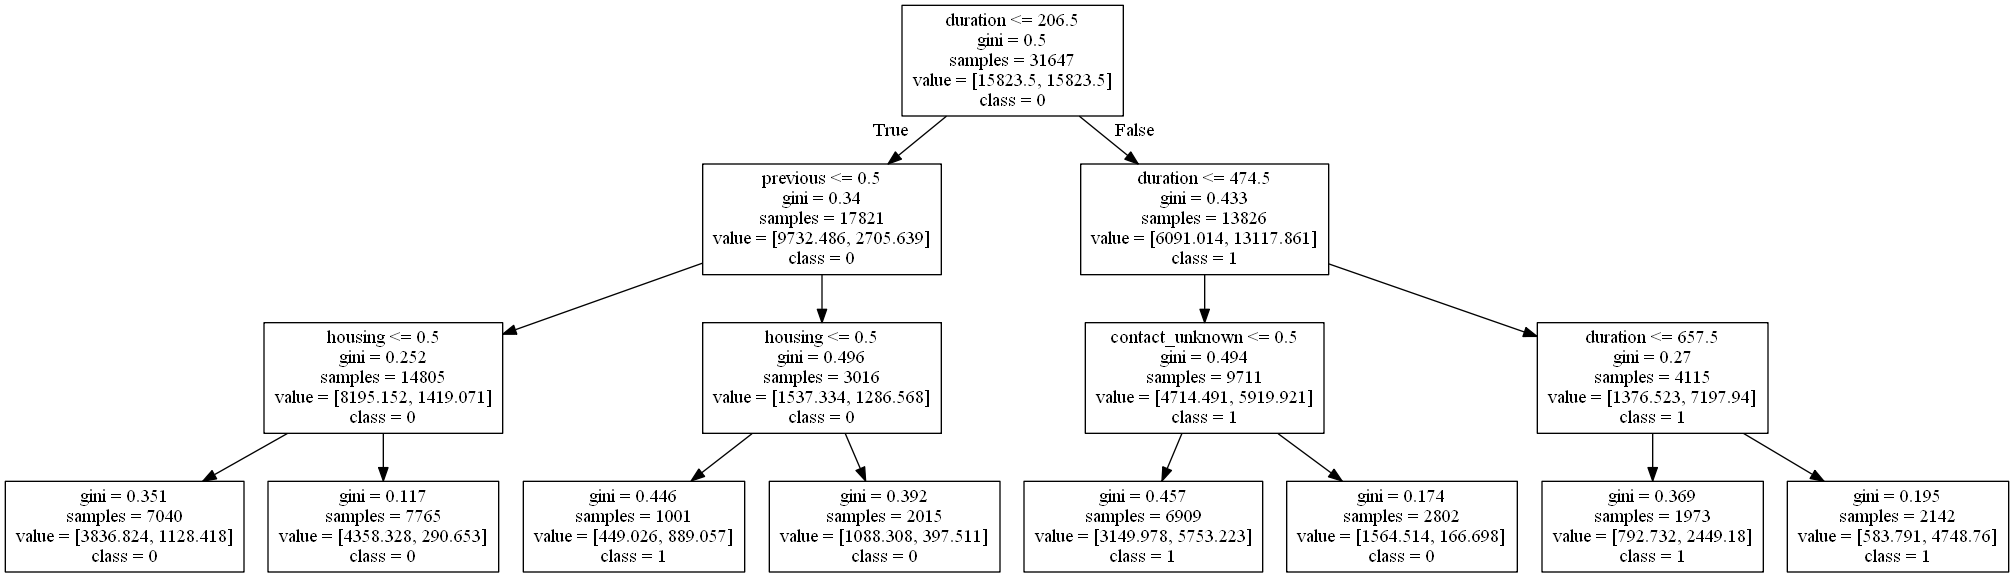

In [724]:
train_char_label = ['0', '1']
TD_Tree_FileR = open('td_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=TD_Tree_FileR, feature_names = list(X_lr_train), class_names = list(train_char_label))
TD_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng td_treeR.dot -o td_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("td_treeR.png"))

In [725]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

dtr_importance = dTreeR.feature_importances_
print (pd.DataFrame(dtr_importance, columns = ["Imp"], index = X_lr_train.columns))

                          Imp
default              0.000000
balance              0.000000
housing              0.061285
loan                 0.000000
duration             0.714077
previous             0.072076
job_admin.           0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
contact_cellular     0.000000
contact_telephone    0.000000
contact_unknown      0.152562
marital_divorced     0.000000
marital_married      0.000000
marital_single       0.000000
education_primary    0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000


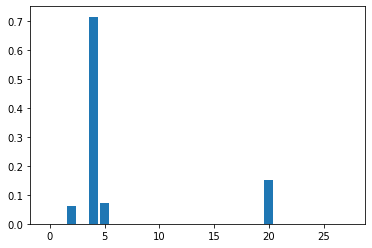

In [726]:
# plot feature importance
pyplot.bar([x for x in range(len(dtr_importance))], dtr_importance)
pyplot.show()

#### Observations:
1. Duration now shows as the root node, which my original multivariate analysis also showed.
2. Contact also shows up as somewhat indicative, but as mentioned earlier, my advice to the business would be to collect better data about contact method to reduce "unknown" categorization

#### Insights:
1. Thru trial and error, adjusted max_depth=3, resulted in lower accuracy, but recall has now improved to approx 87%.
2. Taking into account class_weight=balanced, and setting max_depth has helped this model be more relevant for the Term Deposit business case.

### Now to perform Ensemble Modeling


Bagging Classifier Confusion Matrix


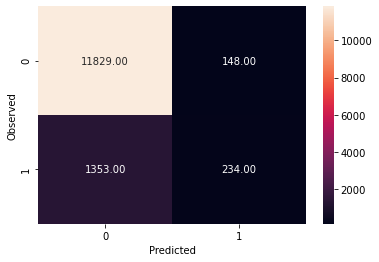

None



LR cw  DT cw  Pruned DT cw  Bagging DT
Training Accuracy  0.802  1.000         0.708       0.987
Testing Accuracy   0.805  0.849         0.705       0.889
Balanced Accuracy  0.805  0.633         0.774       0.568
Recall             0.796  0.350         0.865       0.147
Precision          0.363  0.353         0.266       0.613
F1                 0.498  0.352         0.407       0.238
ROC_AUC            0.805  0.633         0.774       0.568

In [727]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=100, random_state=1, max_features=10, max_samples=.7)

bgcl = bgcl.fit(X_lr_train, y_lr_train)
y_predict = bgcl.predict(X_lr_test)

print('Bagging Classifier Confusion Matrix')

print(draw_cm(y_lr_test,y_predict))
print()

scores = capture_model_performance(bgcl, "Bagging DT", scores, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_predict)
scores

### Notes about Bagging Classifier:
1. With the base_estimator of the overfit DT, balanced accuracy is down to 57%.
2. Thru multiple iterations, performance was improved by tuning the hyperparameters of: max_samples, max_features, and n_estimators (the most important feature).


AdaBoosting Confusion Matrix


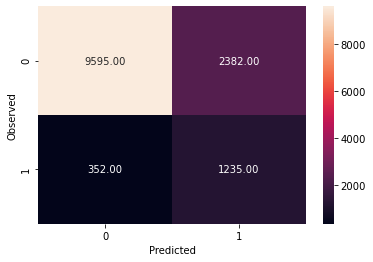

None



LR cw  DT cw  Pruned DT cw  Bagging DT  AdaBoost DTr
Training Accuracy  0.802  1.000         0.708       0.987         0.821
Testing Accuracy   0.805  0.849         0.705       0.889         0.798
Balanced Accuracy  0.805  0.633         0.774       0.568         0.790
Recall             0.796  0.350         0.865       0.147         0.778
Precision          0.363  0.353         0.266       0.613         0.341
F1                 0.498  0.352         0.407       0.238         0.475
ROC_AUC            0.805  0.633         0.774       0.568         0.790

In [728]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(random_state=1, base_estimator=dTreeR, n_estimators=100)
abcl = abcl.fit(X_lr_train, y_lr_train)

print('AdaBoosting Confusion Matrix')
y_predict = abcl.predict(X_lr_test)
print(draw_cm(y_lr_test,y_predict))
print()

scores = capture_model_performance(abcl, "AdaBoost DTr", scores, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_predict)
scores

### Insights:
1. Using the regularized DT results in a model that is now not suffering from overfitting and generally better performance.


Gradient Boosting Confusion Matrix


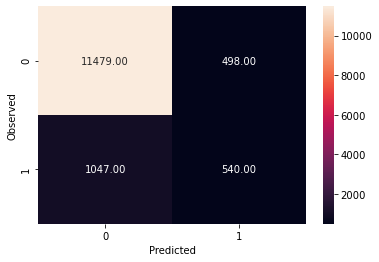

None



LR cw  DT cw  Pruned DT cw  Bagging DT  AdaBoost DTr  \
Training Accuracy  0.802  1.000         0.708       0.987         0.821   
Testing Accuracy   0.805  0.849         0.705       0.889         0.798   
Balanced Accuracy  0.805  0.633         0.774       0.568         0.790   
Recall             0.796  0.350         0.865       0.147         0.778   
Precision          0.363  0.353         0.266       0.613         0.341   
F1                 0.498  0.352         0.407       0.238         0.475   
ROC_AUC            0.805  0.633         0.774       0.568         0.790   

                   Grad. Boost  
Training Accuracy        0.941  
Testing Accuracy         0.886  
Balanced Accuracy        0.649  
Recall                   0.340  
Precision                0.520  
F1                       0.411  
ROC_AUC                  0.649

In [729]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=200, max_features=4, random_state=1, max_depth=5, learning_rate=0.7)

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingClassifier

#hgbcl = HistGradientBoostingClassifier(random_state=1, max_depth=5, scoring="recall", learning_rate=0.7)
gbcl = gbcl.fit(X_lr_train, y_lr_train)

print('Gradient Boosting Confusion Matrix')
y_predict = gbcl.predict(X_lr_test)
print(draw_cm(y_lr_test,y_predict))
print()

scores = capture_model_performance(gbcl, "Grad. Boost", scores, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_predict)
scores

Random Forest Confusion Matrix


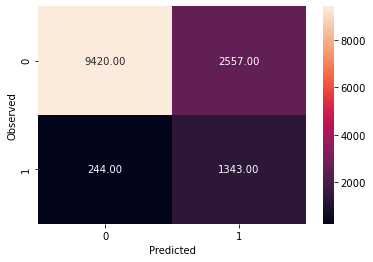

None



LR cw  DT cw  Pruned DT cw  Bagging DT  AdaBoost DTr  \
Training Accuracy  0.802  1.000         0.708       0.987         0.821   
Testing Accuracy   0.805  0.849         0.705       0.889         0.798   
Balanced Accuracy  0.805  0.633         0.774       0.568         0.790   
Recall             0.796  0.350         0.865       0.147         0.778   
Precision          0.363  0.353         0.266       0.613         0.341   
F1                 0.498  0.352         0.407       0.238         0.475   
ROC_AUC            0.805  0.633         0.774       0.568         0.790   

                   Grad. Boost  RF cw  
Training Accuracy        0.941  0.794  
Testing Accuracy         0.886  0.793  
Balanced Accuracy        0.649  0.816  
Recall                   0.340  0.846  
Precision                0.520  0.344  
F1                       0.411  0.490  
ROC_AUC                  0.649  0.816

In [730]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100, random_state=1,max_features=8, class_weight="balanced", max_depth=10, max_leaf_nodes=40)
rfcl = rfcl.fit(X_lr_train, y_lr_train)
y_predict = rfcl.predict(X_lr_test)
print('Random Forest Confusion Matrix')

print(draw_cm(y_lr_test,y_predict))
print()

scores = capture_model_performance(rfcl, "RF cw", scores, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_predict)
scores

#### Insights:
1. Random Forest with class_weight=balanced has balanced accuracy of 82%
2. Changing class_weight=subsample didn't make any difference

In [633]:
from imblearn.ensemble import BalancedBaggingClassifier

Balanced Bagging based on Gradient Boosting Confusion Matrix


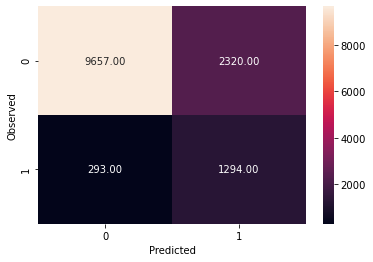

None



LR cw  DT cw  Pruned DT cw  Bagging DT  AdaBoost DTr  \
Training Accuracy  0.802  1.000         0.708       0.987         0.821   
Testing Accuracy   0.805  0.849         0.705       0.889         0.798   
Balanced Accuracy  0.805  0.633         0.774       0.568         0.790   
Recall             0.796  0.350         0.865       0.147         0.778   
Precision          0.363  0.353         0.266       0.613         0.341   
F1                 0.498  0.352         0.407       0.238         0.475   
ROC_AUC            0.805  0.633         0.774       0.568         0.790   

                   Grad. Boost  RF cw  Bal Bagging(gb)  
Training Accuracy        0.941  0.794            0.843  
Testing Accuracy         0.886  0.793            0.807  
Balanced Accuracy        0.649  0.816            0.811  
Recall                   0.340  0.846            0.815  
Precision                0.520  0.344            0.358  
F1                       0.411  0.490            0.498  
ROC_AUC                  0.649  0.816            0.811

In [731]:
bbcl = BalancedBaggingClassifier(base_estimator=gbcl, n_estimators=100, random_state=1, max_features=10, max_samples=.7)
bbcl = bbcl.fit(X_lr_train, y_lr_train)
y_predict = bbcl.predict(X_lr_test)
print('Balanced Bagging based on Gradient Boosting Confusion Matrix')

print(draw_cm(y_lr_test,y_predict))
print()

scores = capture_model_performance(bbcl, "Bal Bagging(gb)", scores, X_lr_train, y_lr_train, X_lr_test, y_lr_test, y_predict)
scores

#### Insights:
1. I used the GradientBoosting model as the based model for the BalancedBagging model. I did this since it's Balanced Accuracy wasn't very good and wanted to see how this ensemble method would improve performance.
2. The BalancedBagging classifier, which uses undersampling provided the best Balanced Accuracy score.

## Overall Summary:
1. One recommendation from this analysis would be for the bank to look at other data - as we saw with Logistic Regression, none of the features were very predictive, and some were not all that insightful (e.g. Contact=unknown). 
2. The biggest challenge with this case was the significant imbalance in the Target class of the dataset. Because of this imbalance, Balanced Accuracy is a better metric.
3. Applying the techniques to address the class imbalance has improved the performance of the algorithms. Random Forest and the BalancedBagging classifiers did the best job of handling the imbalance and had the better Balanced Accuracy scores.
4. There is also a strong case for the Pruned Decision Tree being the best model as it had the highest number of True Positives, and hence the best Recall measure.

The Summary of the various models is:

In [732]:
scores

LR cw  DT cw  Pruned DT cw  Bagging DT  AdaBoost DTr  \
Training Accuracy  0.802  1.000         0.708       0.987         0.821   
Testing Accuracy   0.805  0.849         0.705       0.889         0.798   
Balanced Accuracy  0.805  0.633         0.774       0.568         0.790   
Recall             0.796  0.350         0.865       0.147         0.778   
Precision          0.363  0.353         0.266       0.613         0.341   
F1                 0.498  0.352         0.407       0.238         0.475   
ROC_AUC            0.805  0.633         0.774       0.568         0.790   

                   Grad. Boost  RF cw  Bal Bagging(gb)  
Training Accuracy        0.941  0.794            0.843  
Testing Accuracy         0.886  0.793            0.807  
Balanced Accuracy        0.649  0.816            0.811  
Recall                   0.340  0.846            0.815  
Precision                0.520  0.344            0.358  
F1                       0.411  0.490            0.498  
ROC_AUC                  0.649  0.816            0.811

### Classification Analysis & Summary
#### Confusion matrix translation:
True Positive (observed=1,predicted=1):

Predicted that Term Deposit (TD) will be accepted and the customer did take TD

False Positive (observed=0,predicted=1):

Predicted that Customer loan would take a TD, but the customer declined the offer

True Negative (observed=0,predicted=0):

Predicted that TD will not be taken and the customer chose to not take the TD

False Negative (observed=1,predicted=0):

Predicted that TD will not be taken but the customer chose to take the TD

Precision is a good measure to utilized, when the costs of False Positive is high. For this case, there is not a high cost with False Positives.

**For this scenario, we want to increase the marketing hit rate, meaning get more customers to take the TD offer. Therefore, we want to maximize True Positives, False Negatives are good, and False Positives are not problematic, which increases the max amount of people taking the offer. And it is worth noting we are not trying to minimize marketing costs.**

**Because we took into account the class imbalance, the Balanced Accuracy is a good evaluation metric, as is Recall.**

My recommendation would be to use the Pruned Decision Tree, Random Forest, or Balanced Bagging models. Each of these could have been further tuned, which I am sure we will get more opportunities in the next case.

In [ ]:
scores = scores.iloc[0:0]